#### Unusual Datatypes
<table>
<tr>
<th>Variable Name</th>
<th>Current Datatype</th>
<th>Desired Datatype</th>
</tr>
<tr>
<td>HATCH</td>
<td>Object</td>
<td>int64</td>
</tr>
<tr>
<td>SEDAN</td>
<td>Object</td>
<td>int64</td>
</tr>
<tr>
<td>WAGON</td>
<td>Object</td>
<td>int64</td>
</tr>
<tr>
<td>UTE</td>
<td>Object</td>
<td>int64</td>
</tr>
<tr>
<td>K_SALES_TOT </td>
<td>Object</td>
<td>int64</td>
</tr>
</table>
     
For the given data description, the fields `UTE`, `HATCH`,`SEDAN`, `WAG0N` and `K_SALES_TOT` should be interval/numerical values as opposed to objects.
By using the `.describe()` function, we may be able to uncover the source of the issues in the dataset

# IFN645 Case Study 2
## Mining from Manufacturing, Supermarket, News Stories and Web Log Data

### Contents
1. [Clustering & Pre-processing](#clust)
2. [Association Mining](#association)
3. [Text Mining](#text)
4. [Web Mining](#web)

---
## Part 1: Clustering Pre-processing and K-means analysis<a name="clust"></a>

In [5]:
# Libraries Required for this section
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Import Data for this section from csv (without skipping empty cells)
df = pd.read_csv('Casestudy2-Data-Py/model_car_sales.csv', na_filter=False)

# Get details about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 8 columns):
LOCATION_NUMBER    675 non-null int64
REPORT_DATE        675 non-null object
DEALER_CODE        675 non-null object
UTE                675 non-null object
HATCH              675 non-null object
WAG0N              675 non-null object
SEDAN              675 non-null object
K__SALES_TOT       675 non-null object
dtypes: int64(1), object(7)
memory usage: 42.3+ KB


##### Description of Dataset
Below is a description of the data as it appears in the brief
<table>
<tr>
<th>Variable</th>
<th>Measurement Level</th>
<th>Description</th>
</tr>
<tr>
<td>LOCATION_NUMBER</td>
<td>Nominal</td>
<td>Numeric code for the store</td>
</tr>
<tr>
<td>REPORT_DATE</td>
<td>Unary</td>
<td>Date of the data extraction</td>
</tr>
<tr>
<td>DEALER_CODE</td>
<td>Nominal</td>
<td>Text identifier for the store</td>
</tr>
<tr>
<td>UTE</td>
<td>Interval</td>
<td>Number of Utility/tray back model cars sold by the store</td>
</tr>
<tr>
<td>HATCH</td>
<td>Interval</td>
<td>Number of Utility/tray back model cars sold by the store</td>
</tr>
<tr>
<td>WAG0N</td>
<td>Interval</td>
<td>Number of Station Wagon model cars sold by the store</td>
</tr>
<tr>
<td>SEDAN</td>
<td>Interval</td>
<td>Number of Sedan model cars sold by the store</td>
</tr>
<tr>
<td>K__SALES_TOT</td>
<td>Interval</td>
<td>Total sales for the store</td>
</tr>
</table>

### 1. Can you identify data quality issues in this dataset such as unusual data types, missing values, etc?
By comparing the output from the `info()` method to the table above, a number of data quality issues emerge.

The rows `HATCH`,`SEDAN`,`WAG0N`,`UTE` and `K__SALES_TOT`are of the type `object` in the dataframe, where the data description suggests that the values should be of the type `int` or `float`.

Using the `.describe()` function may uncover the root of the problem within the data set.

In [2]:
# print details for all variables in dataframe
def describeDataset(doc):
    """
    Print Details for each column
    """
    for cols in doc:
        print(df[cols].describe())
        print("-"*20)
        
describeDataset(df)

count    675.0
mean     338.0
std      195.0
min        1.0
25%      169.5
50%      338.0
75%      506.5
max      675.0
Name: LOCATION_NUMBER, dtype: float64
--------------------
count            675
unique             1
top       2013-04-30
freq             675
Name: REPORT_DATE, dtype: object
--------------------
count          675
unique         675
top       Euro-555
freq             1
Name: DEALER_CODE, dtype: object
--------------------
count     675
unique    143
top          
freq       22
Name: UTE, dtype: object
--------------------
count     675
unique    518
top          
freq       22
Name: HATCH, dtype: object
--------------------
count     675
unique    426
top          
freq       22
Name: WAG0N, dtype: object
--------------------
count     675
unique    501
top          
freq       22
Name: SEDAN, dtype: object
--------------------
count     675
unique    109
top       932
freq       25
Name: K__SALES_TOT, dtype: object
--------------------


Analysis of the `.describe()` output show a number of unusual results which may explain the cause of the mismatched data types.

For this output, `top` describes the most commonly occuring value in the dataset. For the fields `UTE`, `HATCH`, `WAG0N` and `SEDAN`, that value appears to be an empty string.

Using the `unique()` function (see below) allows us to identify this as the root cause of our data abnormalities.

In [7]:
# Check for cause of issues in one of the variables
print(df['UTE'].unique())

['50' '78' '97' '' '70' '103' '124' '81' '39' '118' '94' '68' '92' '67'
 '77' '164' '82' '85' '58' '134' '63' '53' '102' '6' '55' '100' '127' '119'
 '144' '111' '114' '56' '60' '86' '122' '64' '169' '95' '104' '137' '51'
 '89' '48' '101' '75' '191' '66' '84' '115' '154' '80' '197' '133' '132'
 '126' '88' '129' '117' '31' '136' '72' '123' '125' '40' '83' '73' '74'
 '113' '62' '106' '121' '65' '165' '90' '152' '91' '128' '107' '99' '93'
 '139' '202' '149' '69' '175' '96' '9' '47' '79' '105' '109' '71' '130'
 '76' '57' '116' '87' '160' '153' '10' '206' '196' '170' '98' '59' '110'
 '112' '178' '135' '140' '141' '120' '147' '151' '209' '23' '173' '61'
 '198' '108' '138' '131' '163' '190' '166' '49' '145' '8' '37' '180' '150'
 '41' '143' '142' '7' '44' '161' '54' '157' '155' '146' '52' '46']


Additionally, we can isolate the rows containing the empty string in order to determine if there is a link between the missing variables in the data source.

By using the `.values()` or `as_matrix()` functions to gather all of the readings where UTE is equal to an empty string we get the following output:

In [12]:
# See Rows where UTE, HATCH, WAG0N or SEDAN contains empty string
mat_view = df[(df['UTE']=='')|(df['HATCH']=='')|(df['WAG0N']=='')|(df['SEDAN']=='')].as_matrix()
print(mat_view)
print("Num Elements: ",len(mat_view))

[[4 '2013-04-30' 'Euro-103' '' '' '' '' '']
 [24 '2013-04-30' 'Euro-123' '' '' '' '' '']
 [50 '2013-04-30' 'Euro-149' '' '' '' '' '']
 [108 '2013-04-30' 'Euro-201' '' '' '' '' '']
 [173 '2013-04-30' 'Euro-260' '' '' '' '' '']
 [174 '2013-04-30' 'Euro-261' '' '' '' '' '']
 [175 '2013-04-30' 'Euro-262' '' '' '' '' '']
 [176 '2013-04-30' 'Euro-263' '' '' '' '' '']
 [177 '2013-04-30' 'Euro-264' '' '' '' '' '']
 [198 '2013-04-30' 'Euro-283' '' '' '' '' '']
 [199 '2013-04-30' 'Euro-284' '' '' '' '' '']
 [200 '2013-04-30' 'Euro-285' '' '' '' '' '']
 [298 '2013-04-30' 'Euro-374' '' '' '' '' '']
 [299 '2013-04-30' 'Euro-375' '' '' '' '' '']
 [300 '2013-04-30' 'Euro-376' '' '' '' '' '']
 [643 '2013-04-30' 'Euro-688' '' '' '' '' '']
 [644 '2013-04-30' 'Euro-689' '' '' '' '' '']
 [645 '2013-04-30' 'Euro-69' '' '' '' '' '']
 [646 '2013-04-30' 'Euro-70' '' '' '' '' '']
 [665 '2013-04-30' 'Euro-89' '' '' '' '' '']
 [666 '2013-04-30' 'Euro-90' '' '' '' '' '']
 [667 '2013-04-30' 'Euro-91' '' '' '' '' '

#### Missing Values
As seen above, 22 rows in the dataset contain empty string values for `UTE`, `HATCH`,`WAG0N` or `SEDAN`. This additionally identifies 22 rows where the `K_SALES_TOT` variable is also missing. A tabulated view of the results can be found below.

<table>
    <tr>
        <th>Variable Name</th>
        <th># Missing Values</th>
    </tr>
    <tr>
        <td>HATCH</td>
        <td>22</td>
    </tr>
    <tr>
        <td>SEDAN</td>
        <td>22</td>
    </tr>
    <tr>
        <td>WAGON</td>
        <td>22</td>
    </tr>
    <tr>
        <td>UTE</td>
        <td>22</td>
    </tr>
    <tr>
        <td>K_SALES_TOT</td>
        <td>22</td>
    </tr>
</table>

For the purposes of performing KMeans clustering on this data, these rows can be dropped from the dataset using the method below.

In [13]:
# Clean and return dataset
def cleanAndConvertDataset1(doc):
    # replace empty elements with np.nan and cast fields to float
    return df[['HATCH','SEDAN','WAG0N','UTE','K__SALES_TOT']].replace('',np.nan).astype(float)
df = cleanAndConvertDataset1(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 5 columns):
HATCH           653 non-null float64
SEDAN           653 non-null float64
WAG0N           653 non-null float64
UTE             653 non-null float64
K__SALES_TOT    653 non-null float64
dtypes: float64(5)
memory usage: 26.4 KB


Finally, visualisation of the data can assist in identifying any remaining data problems.
Using `seaborn` and `matplotlib`; we can graph the distributions for `UTE`, `HATCH`,`WAGON` and `SEDAN` in the dataset.

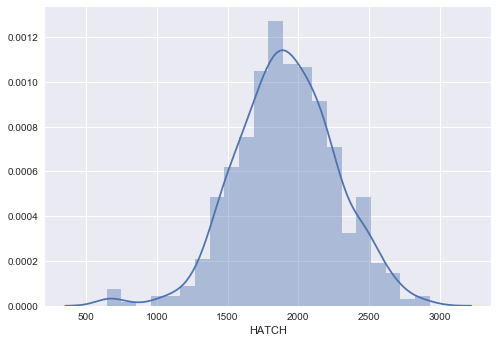

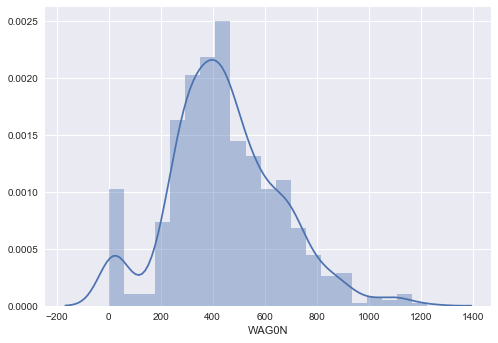

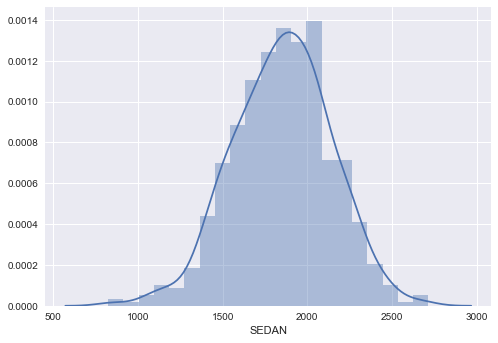

In [14]:
# Distribution of UTE
ute_dist = sns.distplot(df['UTE'].dropna())
plt.show()

# Distribution of Hatch
hatch_dist = sns.distplot(df['HATCH'].dropna())
plt.show()

# Distribution of Wagon
wagon_dist = sns.distplot(df['WAG0N'].dropna())
plt.show()

# Distribution of Sedan
sedan_dist = sns.distplot(df['SEDAN'].dropna())
plt.show()

As we can see in the distplots, there are a number of anomalies for the distribution of `WAG0N` in the dataset - particularly for wagon sales below 200 units. 

In order to quanitfy the anomalous values, we can increasae the number of bins and isolate the data to sales below 200 units as seen below

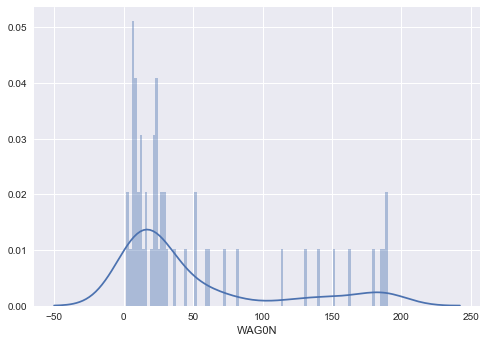

      HATCH   SEDAN  WAG0N    UTE  K__SALES_TOT
439  1695.0  1645.0    2.0   37.0         709.0
154  1693.0  1527.0    3.0  109.0         699.0
276  1629.0  1634.0    5.0   85.0         704.0
373  1541.0  1710.0    6.0  116.0         708.0
367  1842.0  1474.0    6.0   84.0         715.0
12   1811.0  1468.0    6.0   68.0         704.0
270  1715.0  1584.0    6.0   70.0         708.0
221  1574.0  1738.0    7.0   91.0         716.0
183  1562.0  1769.0    8.0   62.0         714.0
603  1496.0  1779.0    8.0   90.0         708.0
352  1896.0  1440.0    8.0   81.0         719.0
80   1509.0  1906.0    8.0   40.0         727.0
195  1748.0  1404.0   11.0  206.0         707.0
532  1790.0  1490.0   11.0  134.0         719.0
28   1760.0  1458.0   12.0   55.0         689.0
285  1501.0  1836.0   13.0   88.0         721.0
594  1724.0  1575.0   13.0   92.0         714.0
395  1550.0  1824.0   14.0   66.0         725.0
618  1524.0  1706.0   16.0  114.0         705.0
446  1356.0  1954.0   17.0   61.0       

C:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [27]:
# Distribution of Wagon
wagon_dist = sns.distplot(df[df['WAG0N'] < 200]['WAG0N'].dropna(),bins=100)
plt.show()

# Print rows with the bottom 10 sales for the station wagons
print(df.sort_values(by='WAG0N')[df['WAG0N'] < 200].head(20))

As shown above, the distplot shows an unusually high number of sales below 50 units.

Additionally, comparing Station Wagon sales to sales of other car models in these instances, We can identify a number of cases where the sales of Station Wagons are over 10 times lower than sales of other vehicles at the same store.

As KMeans clustering is highly affected by outliers, it may be wise to drop these rows.

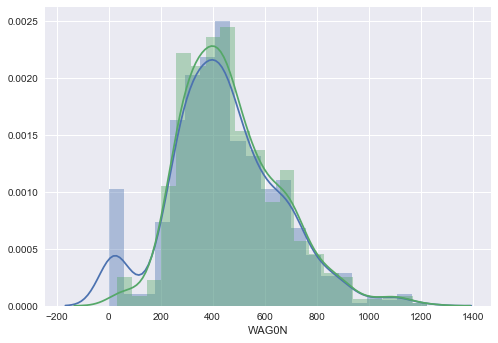

In [28]:
# Drop Outliers from WAG0N
df1 = df[df['WAG0N']>30]

# Distribution of Wagon
wagon_dist = sns.distplot(df['WAG0N'].dropna())
wagon_dist = sns.distplot(df1['WAG0N'].dropna())
plt.show()

### 2. What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice.
For the purposes of clustering, we will include the `HATCH`, `SEDAN`, `WAG0N` and `UTE` variables.
These variables measure the number of sales of a particular model of vehicle made by particular a car dealership (signified by `LOCATION_NUMBER` or `DEALER_CODE`).

The variables `LOCATION_NUMBER` and `DEALER_CODE` will not be included in the analysis, as unique variables do not contribute to clustering models. Additionally, `REPORT_DATE` will not be included in the analysis as it contains the same value for all observations. Finally, `K_SALES_TOT` will also be discluded from the Dataset, as the derrived value is not useful for our analysis.

In [30]:
df2 = df[['UTE','HATCH','WAG0N','SEDAN']].dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 674
Data columns (total 4 columns):
UTE      653 non-null float64
HATCH    653 non-null float64
WAG0N    653 non-null float64
SEDAN    653 non-null float64
dtypes: float64(4)
memory usage: 25.5 KB


### 3. Identify a car model that is underperforming in sales. Based on your reporting, the company does not want to focus thir efforts on this car model anymore and has decided to drop it from manufacturing. Now onwards, the selected car product should not be part of analysis
By plotting the distributions of each model of car, it is possible to identify how car sales are distributed among dealerships.

Below are the sales distributions of each car model.

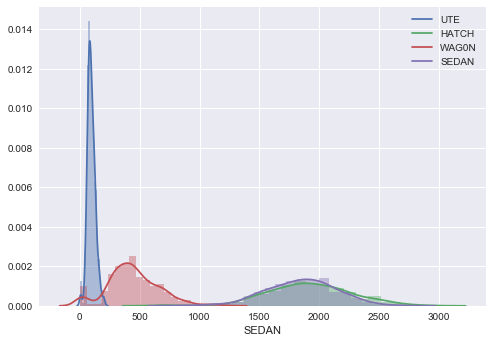

In [31]:
# Distribution of all Models
comb_dist = sns.distplot(df2['UTE'].dropna(),kde_kws={"label":"UTE"})
comb_dist = sns.distplot(df2['HATCH'].dropna(),kde_kws={"label":"HATCH"})
comb_dist = sns.distplot(df2['WAG0N'].dropna(),kde_kws={"label":"WAG0N"})
comb_dist = sns.distplot(df2['SEDAN'].dropna(),kde_kws={"label":"SEDAN"})
plt.show()

As shown above, the `UTE` model has the poorest performance among vehicle models, with the majority of dealerships selling fewer than 100 models over the sales period.

Due to this, the `UTE` model will be removed from the analysis as instructed by the brief.

In [32]:
# Drop underperforming vehicle UTE
df2.drop(['UTE'],axis=1,inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 674
Data columns (total 3 columns):
HATCH    653 non-null float64
WAG0N    653 non-null float64
SEDAN    653 non-null float64
dtypes: float64(3)
memory usage: 20.4 KB


## Task 2. The First Clustering Model
### 1. Build a default clustering model with K = 3


In [33]:
def performKMeansClustering(docIn, k=3, scale=False,rs=42, report_cluster_distances=True):
    """
    Perform KMeans clustering on provided dataset and assign Model ID to each row
    """
    # Create copy of input dataset to return
    doc = docIn.copy()
    
    # convert the dataset into a matrix
    X = doc.as_matrix()
    
    if scale:
        # scale the variables
        s = StandardScaler()
        X = s.fit_transform(X)

    # set the random state for the model
    model = KMeans(n_clusters=k, random_state=rs).fit(X)

    if report_cluster_distances:
        # report sum of intra-cluster distances
        print("Sum of intra-cluster distance:", model.inertia_)
        print("Centroid Locations:")
        for c in model.cluster_centers_:print(c)
            
    # assign cluster to each record in X
    y = model.predict(X)
    
    # Assign cluster id's to each row and return 
    doc['Cluster_ID'] = y
    
    return doc, X

# Perform KMeans clustering on dataset without normalisation
df2, X = performKMeansClustering(df2)

Sum of intra-cluster distance: 75716679.8179
Centroid Locations:
[ 1522.58    79.52  1508.62]
[ 1702.05572755   534.9876161   2063.35603715]
[ 2228.57142857   411.10714286  1666.83928571]


#### a. How many records are assigned into each cluster?

In [34]:
def reportClusterMembership(doc):
    # print the number of members for each cluster
    print("Distribution of Cluster Members")
    print(doc['Cluster_ID'].value_counts())

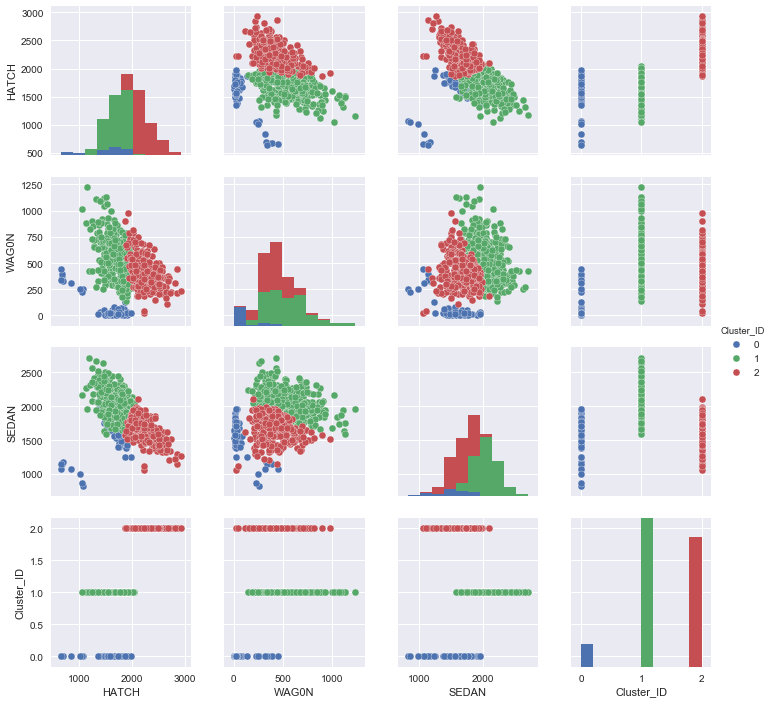

In [35]:
def visCluster(doc):
    """
    Generate Pair Plot to visualise clusters
    """
    # Generate Pairplot for clusters
    cluster = sns.pairplot(doc, hue='Cluster_ID')
    plt.show()

# Plot clusters as pairplot
visCluster(df2)

In [36]:
def clusterDistributions(doc, n_bins=20, cols=[], clusters=[]):
    """
    Plot distribution of variables in each cluster, in relation to distributions of varibles in the dataset
    """
    
    # if specific clusters not provided, go over entire range
    if len(clusters) == 0:
        clusters_to_inspect = doc['Cluster_ID'].unique()

    for cluster in clusters_to_inspect:
        # inspecting cluster 0
        print("Distribution for cluster {}".format(cluster))

        # create subplots
        fig, ax = plt.subplots(nrows=3)
        ax[0].set_title("Cluster {}".format(cluster))

        for j, col in enumerate(cols):
            # create the bins
            bins = np.linspace(min(doc[col]), max(doc[col]), 20)
            # plot distribution of the cluster using histogram
            sns.distplot(doc[doc['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
            # plot the normal distribution with a black line
            sns.distplot(doc[col], bins=bins, ax=ax[j], hist=False, color="k")

        plt.tight_layout()
        plt.show()
        
# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = ['HATCH', 'WAG0N', 'SEDAN']
clusterDistributions(df2,cols=cols)

Distribution for cluster 1


Distribution for cluster 2


Distribution for cluster 0


#### b. Plot the cluster distribution using pairplot. Explain key characteristics of each culuster/segment

Cluster 0 primarily sells Sedans, with their next highest model being Hatchs.

Cluster 1 primarily sells mostly Hatch's, with about equal sales of Sedans and Wagons.

Cluster 2 primarily sells Wagons and Sedans.

### 2. What is the effecti of using the standardization method on the model above? Does the variable normalization process enable a better clustering solution?

In [37]:
# Perform K means clustering with normalised variables
df2, X = performKMeansClustering(df2,scale=True)

Sum of intra-cluster distance: 986.305969354
Centroid Locations:
[ 0.88996297 -0.16712221 -0.6336556   1.04594599]
[-0.60399032  0.41514856  0.73631718 -0.5725439 ]
[-1.11189428 -1.73432989 -1.18073816 -2.19103379]


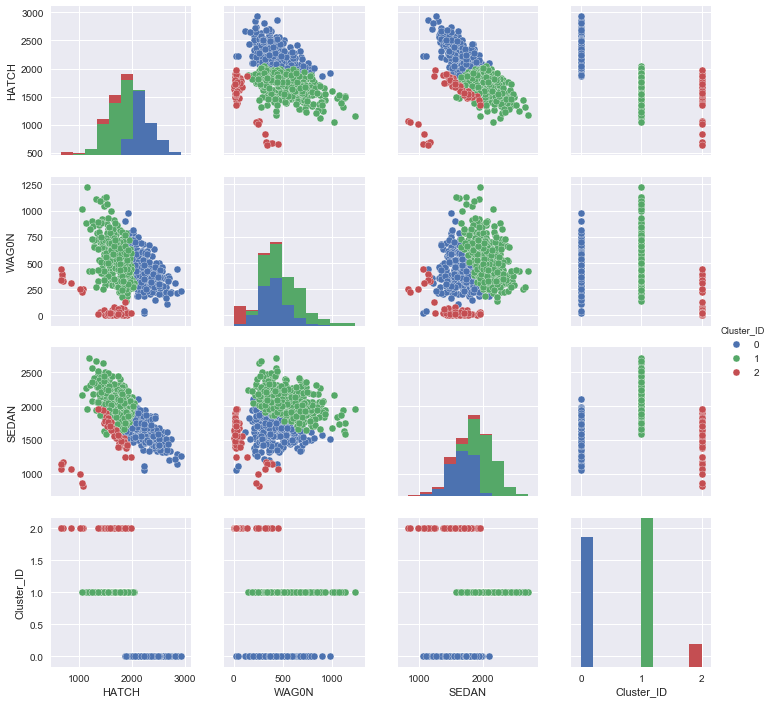

In [38]:
# Plot clusters for the normalised dataset
visCluster(df2)

Distribution for cluster 1


Distribution for cluster 0


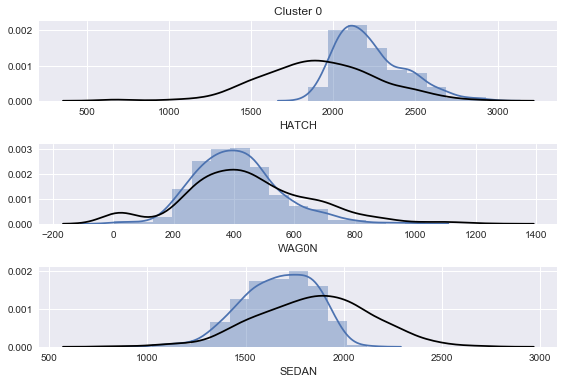

Distribution for cluster 2


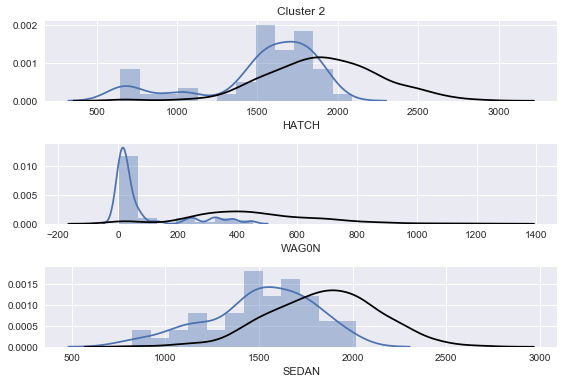

In [39]:
# View Distributions of clusters in the normalised dataset
clusterDistributions(df2,cols=cols)

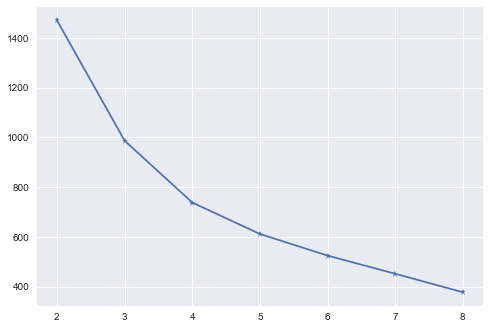

In [40]:
def computeKGraph(doc,X,rs=42,k_range=range(2,9,1)):
    """
    Plot cluster model inertia for given dataset with different leves of K applied
    """
    # Lists for clusters and costs
    clusters = []
    inertia_vals = []

    # calculate inertia for k
    for k in k_range:
        # train with the current K value
        model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
        model.fit(X)

        # append model to lits
        clusters.append(model)
        inertia_vals.append(model.inertia_)

    # Plot the outpt of inertai vs the value of K
    plt.plot(range(2,9,1), inertia_vals, marker='*')
    plt.show()
    return clusters, inertia_vals
    
# Perform analysis on previously calculated dataset
clusters, inertia = computeKGraph(df2,X)

In [ ]:
def identifyOptimalK(clusters,verbose=False):
    """
    Use the elbow rule to identify the optimal value of K
    """
    # Initialise variables for storing optimal K value
    best_K = 0
    maxSilhouette = 0
    
    # Iterate through all elements in 
    for clust in clusters:
        # Get silhouette score for cluster
        sil = silhouette_score(X, clust.predict(X))
        if sil > maxSilhouette:
            maxSilhouette = sil
            best_K = clust.n_clusters
        
        # Print verbose details on each cluster
        if verbose:
            print(clust)
            print("Silhouette Score for K={}".format(clust.n_clusters), sil)
            print("-"*20)
    
    # Print results and return K
    print("Optimal K = ",best_K, "with score ", maxSilhouette)
    return best_K
        
# Compute optimal K based on the provided dataset
optimal_K = identifyOptimalK(clusters)

In [ ]:
# Perform clustering with the optimal K discovered in the previous step
df2, X = performKMeansClustering(df2,k=optimal_K,scale=True)
visCluster(df2)

- Cluster 0 Consists primarily of Sedans with Hatchs being the next most sold model
- Cluster 1 comprises the majority of the dataset. Contains mostly Hatchs with an equal distribution of Wagons and Sedans
- Cluster 2 Consists of Mostly Sedans and Wagons with some Hatchs
- Cluster 3 Consists of equal distributions of Hatch and Sedans with fewer Wagons

### 3. Interpret the cluster analysis outcome. In other words, characterize the nature of each cluster by giving it a descriptive label

---
## Part 2: Association Mining and it's data Pre-processing<a name="association"></a>

### 1. Can you identify data quality issues in this dataset for performing association mining?


In [ ]:
import pandas as pd

# load the transaction dataset
df = pd.read_csv('Casestudy2-Data-Py/pos_transactions.csv')

# info and the first 10 transactions
print(df.info())
print(df.head(10))

From the first 10 transaction shown above, we can easily see that there are duplicated transactions in the dataset.
That can be seen clearly by grouping the data (see the result below)

In [ ]:
df.groupby(df.columns.tolist(),as_index=False).size().sort_values(ascending = False).reset_index().rename(columns={0: 'Frequency'})

The 'Frequency' column in the result above indicates the number of duplicated transactions for each unique transaction in the dataset. Therefore, we will drop those duplicated transactions except for the first occurence.

In [ ]:
df = df.drop_duplicates(subset=None, keep='first', inplace=False)

As were are looking to generate association rules from items purchased by each transaction, we need to group our Transaction_Id and then generate a list of all items purchased.

In [ ]:
# group by Transaction_Id, then list all items
transactions = df.groupby(['Transaction_Id'])['Product_Name'].apply(list)

print(transactions.head(10))

### 2. What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice.
Association mining usually consists of two variables: a transaction ID and an item. Due to the main target which is to find out the associations between items purchased from the health and beauty aids department and the stationary department, the Product_Name should be chosen as the target variable and the Transaction_ID is chosen as ID. In summary, the variables included in the analysis as the below table.

<table>
    <tr>
        <th>Variable Name</th>
        <th>Role</th>
        <th>Measurement Level</th>
    </tr>
    <tr>
        <td>Product_Name</td>
        <td>Target</td>
        <td>Nominal</td>
    </tr>
    <tr>
        <td>Transaction_Id</td>
        <td>ID</td>
        <td>Nominal</td>
    </tr>
</table>

### 3. Conduct association mining and answer the following:
#### a. What is the highest lift value for the resulting rules? Which rule has this value?

Once the transactions table contains all items purchased in each transaction, we will run the apyori model with the pre-processed transactions and min_support of 0.02

In [ ]:
from apyori import apriori

# type cast the transactions from pandas into normal list format and run apriori
transaction_list = list(transactions)
results = list(apriori(transaction_list, min_support=0.02))

# print first 5 rules
print(results[:5])

In [ ]:
def convert_apriori_results_to_pandas_df(results):
    rules = []
    
    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            # items_base = left side of rules, items_add = right side
            # support, confidence and lift for respective rules
            rules.append([','.join(rule.items_base), ','.join(rule.items_add),
                         rule_set.support, rule.confidence, rule.lift]) 
    
    # typecast it to pandas df
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support', 'Confidence', 'Lift']) 

result_df = convert_apriori_results_to_pandas_df(results)

print(result_df.head(20))

In order to find out the highest lift value for the resulting rules, we will sort the rules by Lift using the code below:

In [ ]:
# sort all acquired rules descending by lift# sort a 
result_df = result_df.sort_values(by='Lift', ascending=False)
print(result_df.head(10))

From the result above, the highest lift value is 3.60
There are two rules having this value: Perfume -> Toothbrush and Toothbrush -> Perfume

#### b. What is the highest confidence value for the resulting rules? Which rule has this value?

In order to find out the highest confidence value for the resulting rules, we will sort the rules by Confidence using the code below:

In [ ]:
# sort all acquired rules descending by Confidence# sort a 
result_df = result_df.sort_values(by='Confidence', ascending=False)
print(result_df.head(10))

From the result above, the highest confidence value is 32.39%.
The rule has this value is Magazie & Greeding Cards -> Candy Bar  

#### c. Plot the confidence, lift, support of the resulting rules? Interpret them to discuss the rule-set obtained

### 4. The store is particularly interested in products that individuals purchase when they buy “Pens”.
#### a. How many rules are in the subset?

#### b. Based on the rules, what are the other products these individuals are most likely to purchase?

### 5. How the outcome of this study can be used by decision makers?

---
## Part 3: Text Mining<a name="text"></a>





---
## Part 4: Web Mining<a name="web"></a>


In [ ]:
# Read Web Log into data frame
df = pd.read_csv('Casestudy2-Data-Py/web_log_data.csv', na_filter=False)
df.info()

In [ ]:
print("IP: ",len(df.ip.unique()))
print("Date_Time: ",len(df.date_time.unique()))
print("Request: ",len(df.request.unique()))
print("Step: ",len(df.step.unique()))
print("Session: ",len(df.session.unique()))
print("User_ID: ",len(df.user_id.unique()))

In [ ]:
df.ip.describe()

In [ ]:
df.date_time.describe()

In [ ]:
df.request.describe()

In [ ]:
df.step.describe()

In [ ]:
df.session.describe()

In [ ]:
df.user_id.describe()

In [ ]:
print("User_id different from Session",len(df[df.user_id != df.session]))
print("User_id same as Session",len(df[df.user_id == df.session]))

In [ ]:
def strip_ending_slash(doc):
    """
    Fix data inconsistancies by removing trailing slashes from requests
    """
    # Get Request
    request_string = doc['request']
    # Strip slash from request
    request_string = request_string.strip('/')
    # Add slash back to start of request
    request_string = '/'+request_string
    #return cleaned request to list as new attribute
    doc['request_fix'] = request_string
    
    return doc

In [ ]:
df1 = df.copy()

df1 = df1.apply(strip_ending_slash, axis=1)

In [ ]:
print(df1.info())
print("Length Before: ",len(df1.request.unique()))
print("Length After: ",len(df1.request_fix.unique()))

In [ ]:
print(df1.request.describe())
print(df1.request_fix.describe())
print(df1.request_fix.value_counts())

In [ ]:
print(df1.groupby(['request_fix']).step.unique())

In [ ]:
def make_lower(doc):
    """
    Force requests to lower case to reduce unique values
    """
    # Get Request from data
    reqStr = doc['request']
    # Cast string to lower case
    reqStr = reqStr.lower()
    # Add back to Dataframe as new attribute
    doc['request_lower'] = reqStr
    
    return doc


df2 = df1.apply(make_lower,axis=1)

In [ ]:
print("before: ",len(df2.request_fix.unique()))
print("after: ",len(df2.request_lower.unique()))

In [ ]:
web_log = df2.copy()
web_log.request = web_log.request_lower
web_log = web_log[['ip','request','step','user_id']]
web_log.info()

In [ ]:
print(web_log.groupby(['user_id','request','ip'])['step'].value_counts())

# print(web_log.groupby(['user_id'])['request'].value_counts())

In [ ]:
# # Import libs
# from nltk.tokenize import RegexpTokenizer
# from nltk.corppus import stopwords
# import re



### 1. Association
#### a. What is the Rational behind the selected method

#### b. What variables were included in the analysis and what were their roles and measurement level set? Justify your choice.

#### c. Can you identify data quality issues in order to perform web mining?

#### d. Discuss the results obtained. Discuss also the applicability of findings of the method.

---
### 2. Clustering
#### a. What is the Rational behind the selected method

#### b. What variables were included in the analysis and what were their roles and measurement level set? Justify your choice.


#### c. Can you identify data quality issues in order to perform web mining?


#### d. Discuss the results obtained. Discuss also the applicability of findings of the method.


In [ ]:
# Required Libraries of this project
import networkx as nx

def buildGraph(doc):
    """
    Build a graphs based on requests relating to an ip
    
    for each unique ip create a node
    for each request for that ip create a node and edge
    """
    print("generating graph...")
    
    # Begin Graph
    G = nx.Graph()
    
    # Group Elements by user and get a list of unique users to iterate through
    sessions = doc.groupby(['user_id'])
    users = doc['user_id'].unique()
    
    for user in users:
        # Get subset of dataframe for each user ordered by step
        
        # Initialise a variable to hold the previous request
        prev_req = ''
        
        session_requests = sessions.get_group(user).sort_values(by=['step'])
        for index, row in session_requests.iterrows():
            #for each step in the session
            req = row['request']
            try:
                # Add Current request to structure
                G.add_node(req)
                
                if prev_req != '':
                    G.add_edge(req,prev_req)
                prev_req = req
            except:
                pass
            
    Nn = G.number_of_nodes()
    Ne = G.number_of_edges()
    print('Complete. there are {} nodes and {} edges in the graph'.format(Nn,Ne))
    
    return G

In [ ]:
def drawGraph(G,nodeList=None, labels=False, layout='spring',nAlpha=0.2,nCol='blue',nSize=600,eAlpha=1, eCol='blue',lSize=8):
    if layout == 'spring':
        pos = nx.spring_layout(G)
    elif layout == 'shell':
        pos = nx.shell_layout(G)
    else:
        pos = nx.spectral_layout(G)
        
    # Draw Nodes
    deg = nx.degree(G)
    
    plt.figure(3,figsize=(20,20))
    
    if nodeList == None:
        nx.draw_networkx_nodes(G,pos, alpha=nAlpha,color=nCol,node_size=[d[1]*nSize for d in deg])#[d[1]**2 for d in deg]
    else:
        nx.draw_networkx_nodes(G,pos,nodelist=nodeLists, alpha=nAlpha,color=nCol,node_size=[d[1]*nSize for d in deg])#[d[1]**2 for d in deg]

    if labels:
        # Draw Labels
        nx.draw_networkx_labels(G,pos,font_size=lSize)
#         nx.draw_networkx_labels(G,pos)
    
    # Draw Edges
    nx.draw_networkx_edges(G,pos,alpha=eAlpha,edge_color=eCol)
    plt.show()

In [ ]:
mask= web_log['request'].value_counts()>30
def shouldTrim(doc):
    drequest = doc['request']
    doc['drop'] = mask[drequest]
    return doc
web_trim = web_log.apply(shouldTrim,axis=1)
web_trim = web_trim[web_trim['drop']==True]

# G2 = buildGraph(web_trimmed)
# drawGraph(G2,nSize=300)

In [ ]:
G = buildGraph(web_trim)
drawGraph(G,nSize=2,eAlpha=0.2,labels=True,layout='spring')
drawGraph(G,nSize=2,eAlpha=0.2,labels=True,layout='shell')
drawGraph(G,nSize=2,eAlpha=0.2,labels=True)

In [ ]:
G = buildGraph(web_trim)
# drawGraph(G,nodeLists=['/richlands/'],nSize=2,eAlpha=0.2,labels=True,layout='spring')
# drawGraph(G,nodeLists=['/richlands/'],nSize=2,eAlpha=0.2,labels=True,layout='shell')
# drawGraph(G,nodeLists=['/richlands/'],nSize=2,eAlpha=0.2,labels=True)

In [ ]:
web_log['request'].value_counts()

In [ ]:
web_trim = web_trim[web_trim['request']!='/favicon.ico']

G = buildGraph(web_trim)
drawGraph(G,nSize=2,eAlpha=0.2,labels=True,layout='spring')
drawGraph(G,nSize=2,eAlpha=0.2,labels=True,layout='shell')
drawGraph(G,nSize=2,eAlpha=0.2,labels=True)

In [ ]:
# Import library for centrality analysis
import community

def centrality(G, Nimportant=5, method='degree'):
    """
        returns a subgraph of G with the most important nodes according to the centrality algorithm chosen
    """
    
    if method == 'eigenvector':
        ranking = nx.eigenvector_centrality_numpy(G)
    elif method == 'degree':
        dn = nx.degree(G)
        degs = [dn[u] for u, i in dn]; degs.sort(); degs = degs[::-1]; degs = degs[:Nimportant]
        important_nodes = [u for u, i in dn if dn[u] in degs]
        Gt=G.subgraph(important_nodes)
        important_nodes = [(u,dn[u]) for u,i in dn if dn[u] in degs]
    else:
        phi = (1+math.sqrt(5))/2.0 # largest eigenvalue of adj matrix
        ranking = nx.katz_centrality_numpy(G,1/phi)
    if method != 'degree':
        important_nodes = sorted(ranking.items(), key=operator.itemgetter(1))[::-1][0:Nimportant]
        dnodes=[n[0] for n in important_nodes]
        Gt = G.subgraph(dnodes)
    with open('Centrality_details.txt','w') as f:
        for var in important_nodes:
            f.write('%s\t %.3f\n' %(var[0],var[1]))
    
    return Gt

Gt = centrality(G, Nimportant=10, method='degree')
drawGraph(Gt, labels=True,lSize=20)

In [ ]:
import community
import warnings, numpy as np

''' Find communities in a social media graph G '''
def communities(G):
    # close all plots where possible
    try:
        plt.clf(); plt.cla(); plt.close()
    except:
        pass
    
    # find best partition
    part = community.best_partition(G)
    values = [part.get(node) for node in G.nodes()]  # get labels
    
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)
        plt.savefig('Communities.png')
        plt.show()
    
    # measure number of communities and network modularity
    mod, k = community.modularity(part,G), len(set(part.values()))
    print("Number of Communities = %d\nNetwork modularity = %.2f" %(k,mod)) # https://en.wikipedia.org/wiki/Modularity_%28networks%29
    
    # get members of each partition
    part_members, part_len, dCommunity = {}, {}, []
    for usr,par in part.items():
        if par not in part_members.keys():
            part_members[par]=[usr]; part_len[par]=1
        else:
            part_members[par]=part_members[par]+[usr]; part_len[par]+=1
    
    # save community details into text file
    with open('Community_details.txt','w') as f:
        for com in part_len:
            dCommunity.append((com, part_len[com], set(part_members[com])))
            f.write('community %d\t N=%d\t users= ' %(com,part_len[com]))
            f.write('%s\n' %(' '.join(part_members[com])))
    
    dCommunity.sort(key=lambda tup: tup[1])
    return dCommunity[::-1]

com = communities(G)

In [ ]:
gdeg = nx.degree(G)
for i, j in gdeg:
    print(i)